#Importing Libraries and Dataset#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/fods_assign2/FoDS-Assignment-2.csv')

In [5]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,1.75,2120.0,7420,1.0,0,0,4,7,1060.0,1060,1540,7420,453000.0
1,4,2.50,2180.0,9861,2.0,0,2,3,8,2180.0,0,2390,9761,480000.0
2,3,1.50,1540.0,9800,1.0,0,0,3,7,1010.0,530,1600,8250,180500.0
3,3,3.50,2380.0,6250,2.0,0,3,3,8,1670.0,710,2540,4010,495000.0
4,4,2.50,2230.0,8500,2.0,0,0,3,8,2230.0,0,2270,8770,325000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,4,2.50,2623.0,7184,2.0,0,0,3,8,2623.0,0,2010,4939,333000.0
1184,2,2.00,1730.0,4248,2.0,0,0,3,7,1730.0,0,1380,4000,450000.0
1185,4,2.50,3040.0,6425,2.0,0,0,3,8,3040.0,0,3040,7800,776000.0
1186,4,1.50,2150.0,11026,1.0,0,0,4,7,2150.0,0,1760,10283,400000.0


In [6]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
count,1188.000000,1188.000000,1174.000000,1.188000e+03,1175.000000,1188.000000,1188.000000,1188.000000,1188.000000,1174.000000,1188.000000,1188.000000,1188.000000,1.188000e+03
mean,3.382997,2.143098,2124.656729,1.579757e+04,1.509787,0.003367,0.245791,3.425926,7.687710,1815.946337,304.373737,2019.319865,12889.924242,5.524078e+05
std,0.930045,0.779664,963.523312,6.174847e+04,0.538261,0.057953,0.768059,0.658354,1.175121,859.517568,457.131093,686.068063,26913.741656,3.853805e+05
min,1.000000,0.500000,550.000000,6.960000e+02,1.000000,0.000000,0.000000,2.000000,5.000000,550.000000,0.000000,710.000000,942.000000,1.100000e+05
25%,3.000000,1.750000,1450.000000,5.198500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1510.000000,5178.250000,3.297125e+05
50%,3.000000,2.250000,1950.000000,7.687000e+03,1.500000,0.000000,0.000000,3.000000,8.000000,1590.000000,0.000000,1880.000000,7665.000000,4.621850e+05
75%,4.000000,2.500000,2630.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2250.000000,580.000000,2439.250000,10075.750000,6.623750e+05
max,8.000000,6.000000,9200.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,6640.000000,3000.000000,5790.000000,425581.000000,5.570000e+06


# Data preprocessing #

## Handling the missing values ##

In [7]:
mean1=df['bedrooms'].mean()
df['bedrooms'].fillna(value=mean1, inplace=True)

mean2=df['bathrooms'].mean()
df['bathrooms'].fillna(value=mean2, inplace=True)

mean3=df['sqft_living'].mean()
df['sqft_living'].fillna(value=mean2, inplace=True)

mean4=df['sqft_lot'].mean()
df['sqft_lot'].fillna(value=mean4, inplace=True)

mean5=df['floors'].mean()
df['floors'].fillna(value=mean5, inplace=True)

mean6=df['waterfront'].mean()
df['waterfront'].fillna(value=mean6, inplace=True)

mean7=df['view'].mean()
df['view'].fillna(value=mean7, inplace=True)

mean8=df['condition'].mean()
df['condition'].fillna(value=mean8, inplace=True)

mean9=df['grade'].mean()
df['grade'].fillna(value=mean9, inplace=True)

mean10=df['sqft_above'].mean()
df['sqft_above'].fillna(value=mean10, inplace=True)

mean11=df['sqft_basement'].mean()
df['sqft_basement'].fillna(value=mean11, inplace=True)

mean12=df['sqft_living15'].mean()
df['sqft_living15'].fillna(value=mean12, inplace=True)

mean13=df['sqft_lot15'].mean()
df['sqft_lot15'].fillna(value=mean13, inplace=True)

## Removing outliers ##

In [8]:
z_scores = stats.zscore(df)

In [9]:
z_scores

array([[ 0.66369149, -0.50440099,  0.02067783, ..., -0.69894192,
        -0.20332468, -0.2580557 ],
       [ 0.66369149,  0.45795721,  0.08162627, ...,  0.54052399,
        -0.11630646, -0.18796557],
       [-0.41197766, -0.82518705, -0.56849038, ..., -0.61145021,
        -0.17247243, -0.9654468 ],
       ...,
       [ 0.66369149,  0.45795721,  0.95522052, ...,  1.48835085,
        -0.18919955,  0.5804299 ],
       [ 0.66369149, -0.82518705,  0.05115205, ..., -0.37813898,
        -0.09690299, -0.39564002],
       [-0.41197766, -1.46675918, -0.91386485, ..., -1.0051629 ,
        -0.15760387, -0.4748159 ]])

In [10]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <= 3).all(axis=1)
df = df[filtered_entries]

In [11]:
df=df.drop(['waterfront'],axis=1)

## Standardization ##

In [12]:
df=(df-df.min())/(df.max()-df.min())

In [13]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,0.6,0.333333,0.435965,0.042244,0.0,0.0,0.666667,0.333333,0.137466,0.634731,0.249249,0.070070,0.218471
1,0.6,0.533333,0.448316,0.057580,0.5,1.0,0.333333,0.500000,0.439353,0.000000,0.504505,0.095391,0.235669
2,0.4,0.266667,0.316571,0.057197,0.0,0.0,0.333333,0.333333,0.123989,0.317365,0.267267,0.079047,0.044904
4,0.6,0.533333,0.458609,0.049030,0.5,0.0,0.333333,0.500000,0.452830,0.000000,0.468468,0.084672,0.136943
5,0.2,0.133333,0.170416,0.013344,0.0,0.0,0.666667,0.333333,0.075472,0.000000,0.225225,0.023883,0.260510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.6,0.533333,0.539509,0.040762,0.5,0.0,0.333333,0.500000,0.558760,0.000000,0.390390,0.043234,0.142038
1184,0.2,0.400000,0.355683,0.022316,0.5,0.0,0.333333,0.333333,0.318059,0.000000,0.201201,0.033077,0.216561
1185,0.6,0.533333,0.625349,0.035993,0.5,0.0,0.333333,0.500000,0.671159,0.000000,0.699700,0.074180,0.424204
1186,0.6,0.266667,0.442141,0.064900,0.0,0.0,0.666667,0.333333,0.431267,0.000000,0.315315,0.101037,0.184713


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 0 to 1187
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1077 non-null   float64
 1   bathrooms      1077 non-null   float64
 2   sqft_living    1077 non-null   float64
 3   sqft_lot       1077 non-null   float64
 4   floors         1077 non-null   float64
 5   view           1077 non-null   float64
 6   condition      1077 non-null   float64
 7   grade          1077 non-null   float64
 8   sqft_above     1077 non-null   float64
 9   sqft_basement  1077 non-null   float64
 10  sqft_living15  1077 non-null   float64
 11  sqft_lot15     1077 non-null   float64
 12  price          1077 non-null   float64
dtypes: float64(13)
memory usage: 117.8 KB


## Data splitting ##

In [15]:
df_train,df_test=np.split(df.sample(frac=1,random_state=42),[int(0.7*(len(df)))])

In [16]:
x_train=df_train.drop(labels='price',axis=1)
y_train=df_train['price']

x_test=df_test.drop(labels='price',axis=1)
y_test=df_test['price']

In [17]:
x_test.shape

(324, 12)

In [18]:
y_train

467     0.354140
598     0.407643
1059    0.286306
638     0.133726
908     0.087389
          ...   
180     0.184650
741     0.328025
1112    0.050732
182     0.061783
770     0.413248
Name: price, Length: 753, dtype: float64

In [19]:
# def model(X,Y,learning_rate,iterations,theta):
#   m=Y.size
#   cost_list_train=[]
#   cost_list_test=[]
#   epochs=[]

#   for i in range(iterations):
#     # print(theta.shape)
#     # print(X.shape)
#     # print(type(theta))
#     # print(type(X))
#     q=len(x_test)
#     y_pred=np.dot(X,theta)
#     y_test_er=(y_test.values).reshape(495,1)
#     x_test_er=X
#     x_test_er=x_test_er.values
#     y_pred_er=np.dot(x_test_er,theta)
#     cost=(1/(2*m))*np.sum(np.square(Y-y_pred))

#     t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))

#     d_theta=(1/q)*np.dot(X.T,y_pred-Y)
    
#     # print(type(cost))
#     # print("printing d_theta type!!! ")
#     # print((X.T).shape)
#     # print(Y.shape)
#     # print(y_pred.shape)
#     # print(d_theta.shape)
#     # print(type(d_theta))
#     theta=theta-(learning_rate*d_theta)
#     # print(theta.shape)
#     if(i%50==0):
#       print(f'The training error is {cost} and the testing error is {t_cost}')
#       cost_list_train.append(cost)
#       cost_list_test.append(t_cost)
#       epochs.append(i+1)

    

#   return theta,cost_list_train,cost_list_test,epochs

In [20]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
467,0.4,0.466667,0.571828,0.193593,0.50,0.0,0.333333,0.500000,0.601078,0.000000,0.654655,0.383533
598,0.8,0.600000,0.685046,0.073582,0.00,0.0,0.333333,0.833333,0.320755,0.952096,0.621622,0.119609
1059,0.4,0.466667,0.442141,0.053742,0.50,0.0,0.333333,0.500000,0.431267,0.000000,0.459459,0.090037
638,0.8,0.333333,0.351566,0.070391,0.00,0.0,0.333333,0.333333,0.140162,0.383234,0.096096,0.101870
908,0.4,0.333333,0.281576,0.050406,0.00,0.0,0.333333,0.333333,0.221024,0.000000,0.198198,0.071205
...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.4,0.133333,0.176592,0.006082,0.25,0.0,0.333333,0.333333,0.083558,0.000000,0.249249,0.033942
741,0.4,0.666667,0.374210,0.005937,1.00,0.0,0.333333,0.500000,0.266846,0.167665,0.303303,0.006046
1112,0.2,0.333333,0.225996,0.043375,0.00,0.0,0.333333,0.166667,0.148248,0.000000,0.156156,0.069312
182,0.6,0.400000,0.347449,0.044179,0.25,0.0,0.666667,0.333333,0.307278,0.000000,0.231231,0.076440


In [21]:
y_train

467     0.354140
598     0.407643
1059    0.286306
638     0.133726
908     0.087389
          ...   
180     0.184650
741     0.328025
1112    0.050732
182     0.061783
770     0.413248
Name: price, Length: 753, dtype: float64

## Feature Selection Matrix ##

In [22]:
def matrix_x(features,dataframe):
  m=len(dataframe)
  x=[]
  # for i in range(m):
  #   x.append(1)
  # print(x)
  for i in range(m):
    x.append(1)
    k=len(features)
    for j in range(k):
      index=features[j]
      # index=index-1
      var=dataframe.iloc[i,index]
      # print(var)
      x.append(var)
  
  col=int((len(x))/(m))
  x=np.array(x).reshape(m,col)
  X=pd.DataFrame(data=x)
  return X

In [73]:
dictionary={1:'bedrooms',2:'bathrooms',3:'sqft_living',4:'sqft_lot',5:'floors',6:'view',7:'condition',8:'grade',9:'sqft_above',10:'sqft_basement',11:'sqft_living15',12:'sqft_lot15'}

In [24]:
training=[]
testing=[]
x_axis=[]

In [25]:
vis=np.zeros(13)

In [ ]:
forward_features=[]

## Gradient Descent Model ##

In [64]:
def model(X,Y,learning_rate,iterations,theta,features):
  m=Y.size
  cost_train=0
  cost_test=0
  epochs=[]
  # print(type(X))
  # print(X)
  for i in range(iterations):
    q=len(x_test)
    # print(q)
    # print(X)
    
    y_pred=np.dot(X,theta)
    # print(y_pred)
    y_test_er=(y_test.values).reshape(q,1)
    x_test_er=matrix_x(features,df_test)
    x_test_er=x_test_er.values
    y_pred_er=np.dot(x_test_er,theta)
    cost=(1/(2*m))*np.sum(np.square(Y-y_pred))
    # print(type(cost))

    t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))

    d_theta=(1/m)*np.dot(X.T,y_pred-Y)

    theta=theta-(learning_rate*d_theta)

    # if(i%50==0):
    #   print(f'The training error is {cost} and the testing error is {t_cost}')

    cost_train=cost
    cost_test=t_cost

  return cost_train,cost_test,theta


# Models for Regression #

## Forward Feature Selection ##

In [65]:
vis=np.zeros(13)
training=[]
testing=[]
x_axis=[]
min=10000000000
selected=[]
weightage=0
forward_features=[]
for i in range(0,12):
  min_train=1000000000
  min_test=1000000000
  idx=-1
  for j in range(0,12):
    if(vis[j]==0):
      temp=forward_features.copy()
      temp.append(j)
      n=len(y_train)
      m=len(temp)
      Y=y_train.values.reshape((n,1))
      weights=np.ones((m+1,1))
      mat=matrix_x(temp,df_train)
      # print(mat)
      # print(type(mat))
      error_train,error_testing,param=model(mat.values,Y,learning_rate=0.05,iterations=200,theta=weights,features=temp)
      print(f'Value of i: {i} and value of j: {j}')
      print(f'The training error is {error_train} and the testing error is {error_testing}')
      if(error_train<min_train):
        min_train=error_train
        min_test=error_testing
        idx=j
        if(min>error_train):
          min=error_train
          weightage=param
          selected=temp
  if(idx!=-1):
    vis[idx]=1
    forward_features.append(idx)
    training.append(min_train)
    testing.append(min_test)


Value of i: 0 and value of j: 0
The training error is 0.010805125112801347 and the testing error is 0.012522331224585917
Value of i: 0 and value of j: 1
The training error is 0.009337709161368639 and the testing error is 0.010645303745402124
Value of i: 0 and value of j: 2
The training error is 0.0075654923193994115 and the testing error is 0.007735871328952265
Value of i: 0 and value of j: 3
The training error is 0.013615964660293602 and the testing error is 0.01344183118043368
Value of i: 0 and value of j: 4
The training error is 0.014514144928609234 and the testing error is 0.01488288743978824
Value of i: 0 and value of j: 5
The training error is 0.015717329460027674 and the testing error is 0.024537837626786786
Value of i: 0 and value of j: 6
The training error is 0.014661593615454833 and the testing error is 0.01515058167685771
Value of i: 0 and value of j: 7
The training error is 0.007403974285850057 and the testing error is 0.0076997301554111
Value of i: 0 and value of j: 8
The 

In [75]:
selected

[2, 7, 0, 6]

In [77]:
l=len(selected)
print('The selected featurs are:-')
for i in range(l):
  val=selected[i];
  print(f'{dictionary[val+1]}')

The selected featurs are:-
sqft_living
grade
bedrooms
condition


In [ ]:
training

[0.007403975681377384,
 0.0072206139334508035,
 0.007720015867135386,
 0.008629451978324008,
 0.009562265561466153,
 0.010371397976318877,
 0.011792814197946954,
 0.013313371617933546,
 0.0158846654273624,
 0.018948864498188996,
 0.023995876440320918,
 0.029911920258078085]

In [ ]:
testing

[0.00769974709909612,
 0.007930726741487154,
 0.007781585200856538,
 0.008956512676563692,
 0.01048795129211011,
 0.011647962389383874,
 0.013496168698083616,
 0.014814552054394251,
 0.016838901559214095,
 0.02071089711892393,
 0.03154418078725089,
 0.03649395714885819]

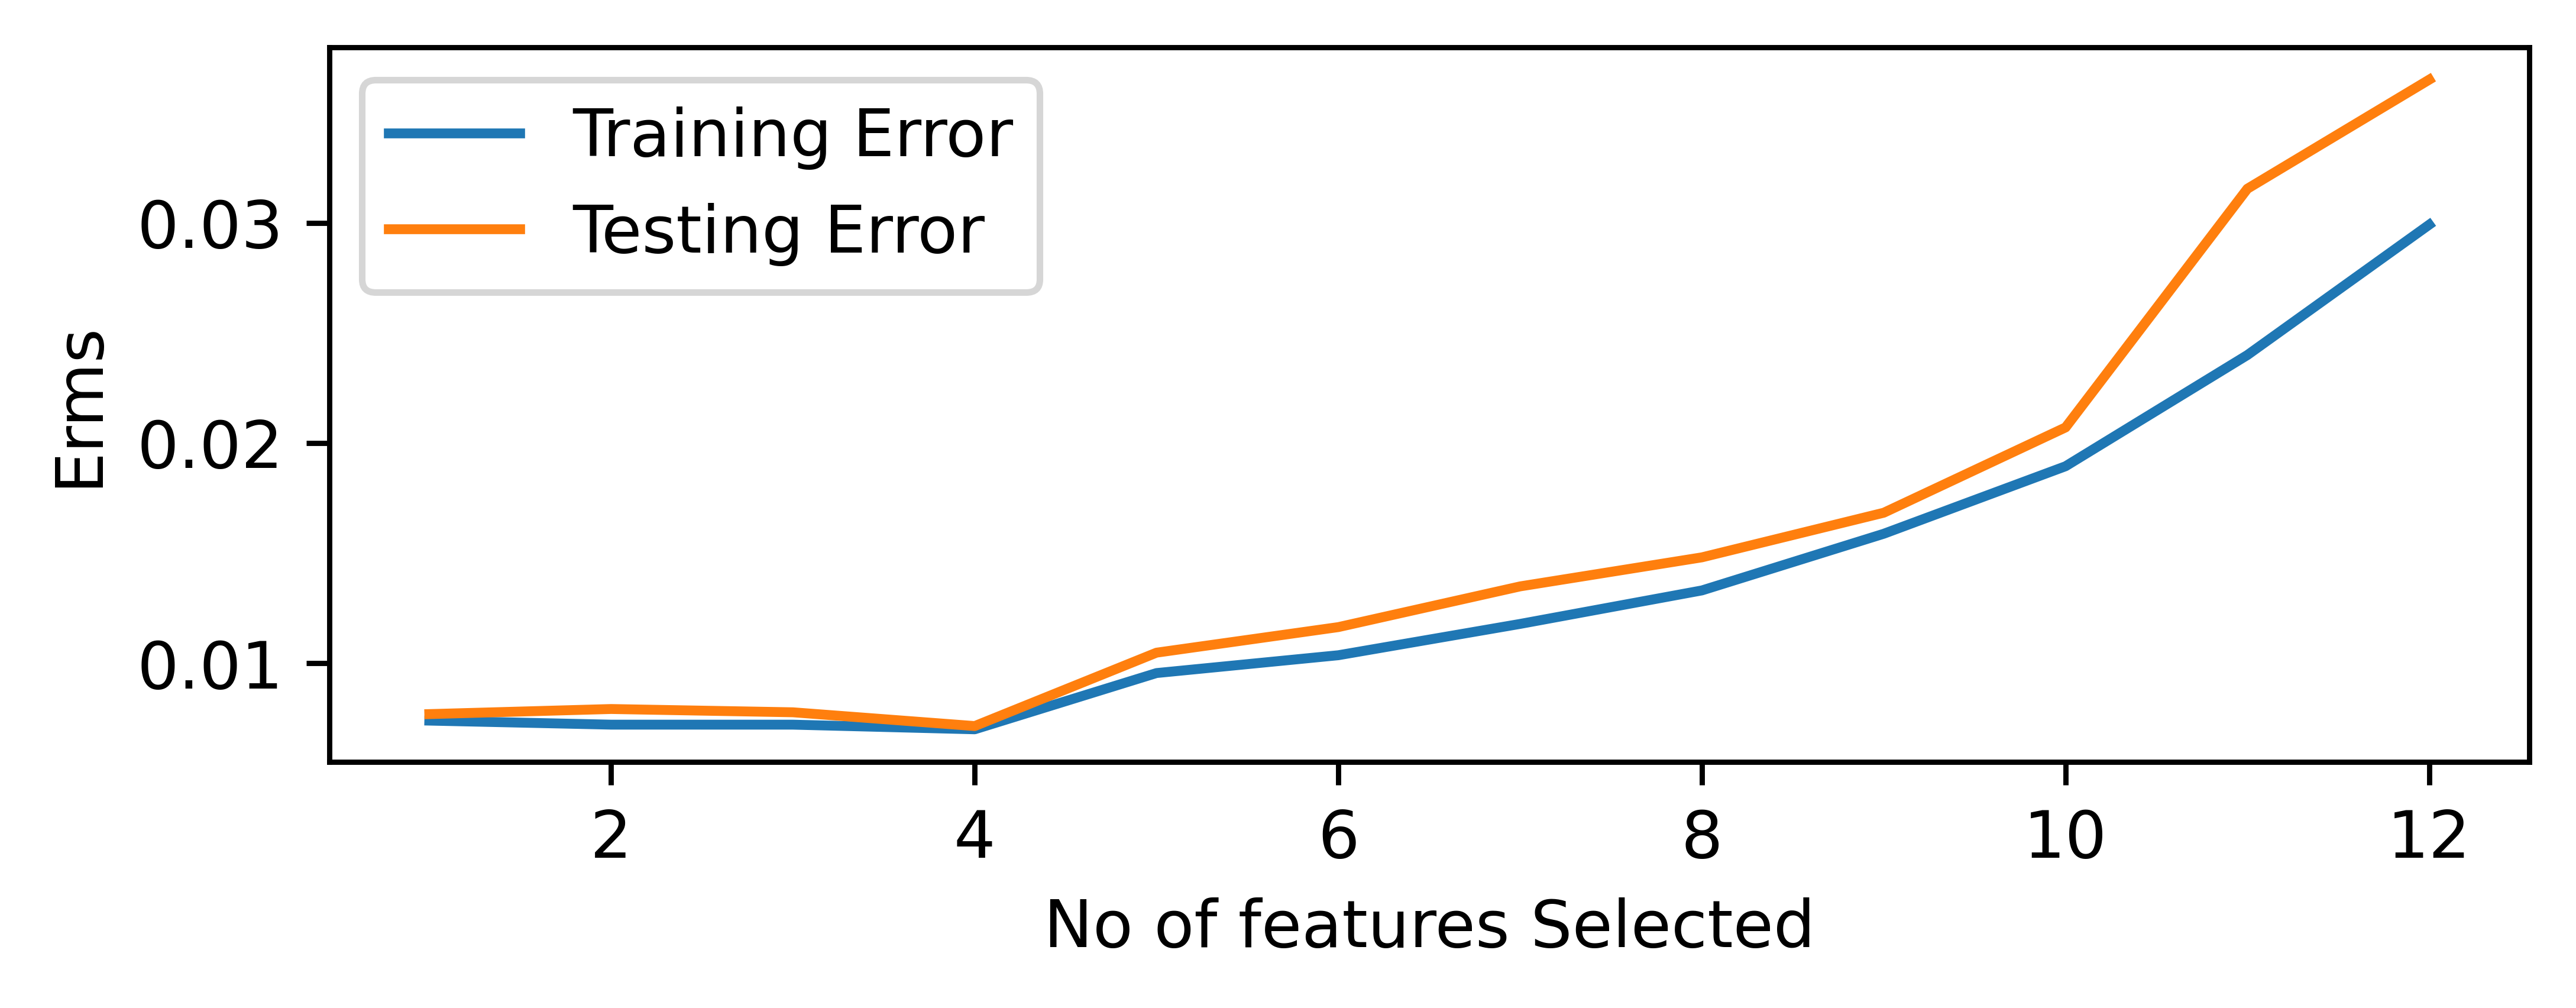

In [59]:
x=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(dpi=800,figsize=(6,2))
plt.xlabel('No of features Selected')
plt.ylabel('Erms')
plt.plot(x,training)
plt.plot(x,testing)
plt.legend(['Training Error','Testing Error'])
plt.show()

In [ ]:
len(df)

1077

## Backward Feature Selection ##

In [ ]:
vis_backward=np.ones(12)
training_backward=[]
testing_backward=[]
x_axis_backward=[]
backward_features=[0,1,2,3,4,5,6,7,8,9,10,11]

In [ ]:
vis_backward

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
vis_backward=np.ones(12)
training_backward=[]
testing_backward=[]
x_axis_backward=[]
min=10000000000
selected=[]
weightage=0
backward_features=[0,1,2,3,4,5,6,7,8,9,10,11]
for i in range(0,12):
  min_train=1000000000
  min_test=1000000000
  idx=-1
  
  for j in range(0,12):
    if(vis_backward[j]==1):
      print(backward_features)
      temp=backward_features.copy()
      temp.remove(j)
      n=len(y_train)
      m=len(temp)
      Y=y_train.values.reshape((n,1))
      weights=np.ones((m+1,1))
      mat=matrix_x(temp,df_train)
      # print(mat)
      # print(type(mat))
      error_train,error_testing,param=model(mat.values,Y,learning_rate=0.05,iterations=100,theta=weights,features=temp)
      print(f'Value of i: {i} and value of j: {j}')
      print(f'The training error is {error_train} and the testing error is {error_testing}')
      if(error_train<min_train):
        min_train=error_train
        min_test=error_testing
        idx=j
      if(min>error_train):
          min=error_train
          weightage=param
          selected=temp
  if(idx!=-1):
    x_axis_backward.append(i+1)
    vis_backward[idx]=0
    # print(idx)
    # print(backward_features)
    backward_features.remove(idx)
    print(f'the selected index is {idx}')
    # backward_features.append(idx)
    training_backward.append(min_train)
    testing_backward.append(min_test)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Value of i: 0 and value of j: 0
The training error is 0.04272710106832257 and the testing error is 0.05434504207354091
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Value of i: 0 and value of j: 1
The training error is 0.04210651119324514 and the testing error is 0.0532020554188465
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Value of i: 0 and value of j: 2
The training error is 0.04161679161715772 and the testing error is 0.05258715673813757
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Value of i: 0 and value of j: 3
The training error is 0.03664387400224522 and the testing error is 0.049991668649224524
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Value of i: 0 and value of j: 4
The training error is 0.042372014411051206 and the testing error is 0.053955403237232635
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Value of i: 0 and value of j: 5
The training error is 0.03454277174352706 and the testing error is 0.03846213303489379
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Value of i:

In [81]:
selected

[2, 7]

In [82]:
l=len(selected)
print('The selected featurs are:-')
for i in range(l):
  val=selected[i];
  print(f'{dictionary[val+1]}')

The selected featurs are:-
sqft_living
grade


In [84]:
training_backward

[0.03454277174352706,
 0.02731990955218315,
 0.023413299238855257,
 0.019043196917208186,
 0.015557890343068871,
 0.012388764742972597,
 0.010848499623349682,
 0.00934179653610245,
 0.008140694813301054,
 0.0074662090728484344,
 0.008808299919723997,
 0.011958776650066203]

In [85]:
testing_backward

[0.03846213303489379,
 0.030788877770133474,
 0.025570284873316664,
 0.02100705842176033,
 0.016628899240003728,
 0.014083374874216655,
 0.01200551362256512,
 0.009713802625442788,
 0.008202067789678448,
 0.00727818386927288,
 0.008686882672472009,
 0.012772996130361489]

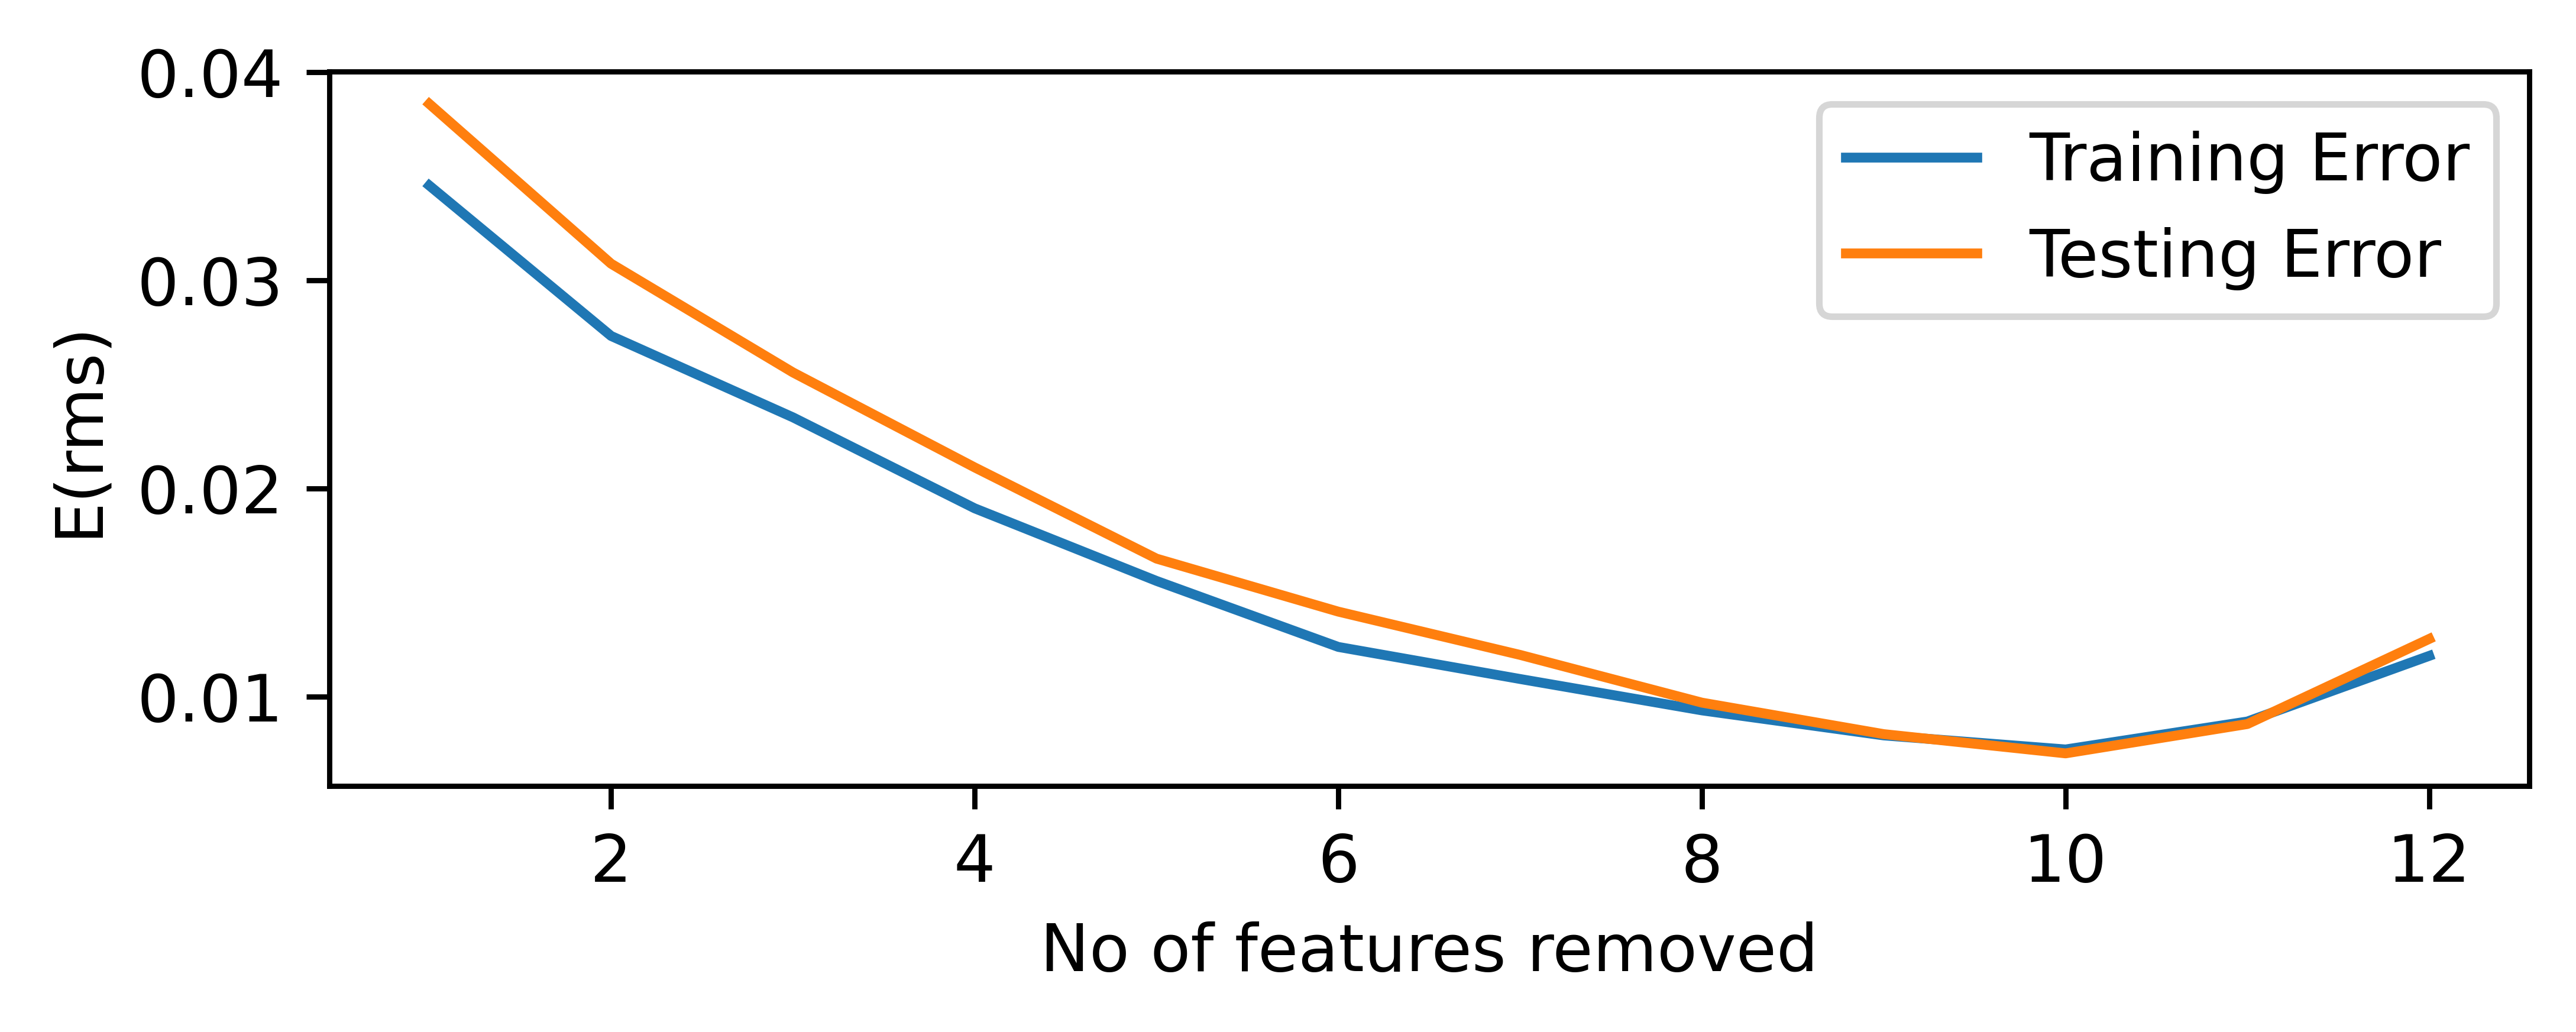

In [86]:
x=[1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(dpi=800,figsize=(6,2))
plt.xlabel('No of features removed')
plt.ylabel('E(rms)')
plt.plot(x,training_backward)
plt.plot(x,testing_backward)
plt.legend(['Training Error','Testing Error'])
plt.show()

In [ ]:
df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.504609,0.570760,0.090304,0.166790,0.014052,0.040004,0.356343,0.477125,0.275498,0.405000,0.093112,0.338951
bathrooms,0.504609,1.000000,0.692745,0.056185,0.528038,0.063763,-0.082929,0.642045,0.649662,0.197802,0.541264,0.067219,0.478453
sqft_living,0.570760,0.692745,1.000000,0.215403,0.339227,0.115542,-0.039625,0.694172,0.805502,0.340482,0.689310,0.220637,0.613149
sqft_lot,0.090304,0.056185,0.215403,1.000000,-0.072703,-0.004514,0.056343,0.116303,0.190440,0.071867,0.237395,0.800089,0.103071
floors,0.166790,0.528038,0.339227,-0.072703,1.000000,-0.014491,-0.294446,0.480288,0.556366,-0.325509,0.294906,-0.086420,0.267948
view,0.014052,0.063763,0.115542,-0.004514,-0.014491,1.000000,-0.003833,0.088312,0.023104,0.176097,0.111124,-0.014883,0.275853
condition,0.040004,-0.082929,-0.039625,0.056343,-0.294446,-0.003833,1.000000,-0.193846,-0.157045,0.211676,-0.112237,0.074239,0.039756
grade,0.356343,0.642045,0.694172,0.116303,0.480288,0.088312,-0.193846,1.000000,0.714390,0.082747,0.684824,0.132718,0.621507
sqft_above,0.477125,0.649662,0.805502,0.190440,0.556366,0.023104,-0.157045,0.714390,1.000000,-0.177874,0.705425,0.182645,0.544398
sqft_basement,0.275498,0.197802,0.340482,0.071867,-0.325509,0.176097,0.211676,0.082747,-0.177874,1.000000,0.118980,0.089038,0.246868


## Model Without any pre-processing ##

In [34]:
df2=pd.read_csv('/content/drive/MyDrive/fods_assign2/FoDS-Assignment-2.csv')

In [35]:
mean1=df2['bedrooms'].mean()
df2['bedrooms'].fillna(value=mean1, inplace=True)

mean2=df2['bathrooms'].mean()
df2['bathrooms'].fillna(value=mean2, inplace=True)

mean3=df2['sqft_living'].mean()
df2['sqft_living'].fillna(value=mean2, inplace=True)

mean4=df2['sqft_lot'].mean()
df2['sqft_lot'].fillna(value=mean4, inplace=True)

mean5=df2['floors'].mean()
df2['floors'].fillna(value=mean5, inplace=True)

mean6=df2['waterfront'].mean()
df2['waterfront'].fillna(value=mean6, inplace=True)

mean7=df['view'].mean()
df['view'].fillna(value=mean7, inplace=True)

mean8=df2['condition'].mean()
df2['condition'].fillna(value=mean8, inplace=True)

mean9=df2['grade'].mean()
df2['grade'].fillna(value=mean9, inplace=True)

mean10=df2['sqft_above'].mean()
df2['sqft_above'].fillna(value=mean10, inplace=True)

mean11=df2['sqft_basement'].mean()
df2['sqft_basement'].fillna(value=mean11, inplace=True)

mean12=df2['sqft_living15'].mean()
df2['sqft_living15'].fillna(value=mean12, inplace=True)

mean13=df2['sqft_lot15'].mean()
df2['sqft_lot15'].fillna(value=mean13, inplace=True)

In [46]:
df_train_feat,df_test_feat=np.split(df2.sample(frac=1,random_state=42),[int(0.7*(len(df2)))])

In [47]:
x_train_feat=df_train_feat.drop(labels='price',axis=1)
y_train_feat=df_train_feat['price']

x_test_feat=df_test_feat.drop(labels='price',axis=1)
y_test_feat=df_test_feat['price']

In [61]:
def model_raw(X,Y,learning_rate,iterations,theta,features):
  m=Y.size
  cost_train=[]
  cost_test=[]
  epochs=[]
  # print(type(X))
  # print(X)
  for i in range(iterations):
    q=len(x_test_feat)
    # print(q)
    # print(X)
    
    y_pred=np.dot(X,theta)
    # print(y_pred)
    y_test_er=(y_test_feat.values).reshape(q,1)
    x_test_er=matrix_x(features,df_test_feat)
    x_test_er=x_test_er.values
    y_pred_er=np.dot(x_test_er,theta)
    cost=(1/(2*m))*np.sum(np.square(Y-y_pred))
    # print(type(cost))

    t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))

    d_theta=(1/m)*np.dot(X.T,y_pred-Y)

    theta=theta-(learning_rate*d_theta)

    if(i%50==0):
      epochs.append(i+1)
      cost_train.append(cost)
      cost_test.append(t_cost)
      print(f'The training error is {cost} and the testing error is {t_cost}')
    

  return cost_train,cost_test,epochs


In [88]:
vis=np.zeros(13)
training=[]
testing=[]
x_axis=[]
feature=[0,1,2,3,4,5,6,7,8,9,10,11]
n=len(y_train_feat)
m=len(feature)
Y=y_train_feat.values.reshape((n,1))
weights=np.ones((m+1,1))
mat=matrix_x(feature,df_train_feat)
# print(mat)
# print(type(mat))
error_train,error_testing,epoc=model_raw(mat.values,Y,learning_rate=0.000000000001,iterations=1000,theta=weights,features=feature)
# print(f'Value of i: {i} and value of j: {j}')
print(f'The final training error is {error_train} and the final testing error is {error_testing}')

The training error is 199202561123.79272 and the testing error is 251164921409.34122
The training error is 196872445033.23196 and the testing error is 250271379072.3427
The training error is 194695061450.93127 and the testing error is 250595988222.89374
The training error is 192659818182.04724 and the testing error is 252011058599.9467
The training error is 190756858222.32474 and the testing error is 254399310944.5613
The training error is 188977008728.86395 and the testing error is 257653098883.73105
The training error is 187311733532.8028 and the testing error is 261673686812.04666
The training error is 185753088948.0722 and the testing error is 266370579813.1137
The training error is 184293682647.44562 and the testing error is 271660901939.92392
The training error is 182926635392.98297 and the testing error is 277468819431.32855
The training error is 181645545422.74704 and the testing error is 283725005681.71356
The training error is 180444455309.42148 and the testing error is 29036

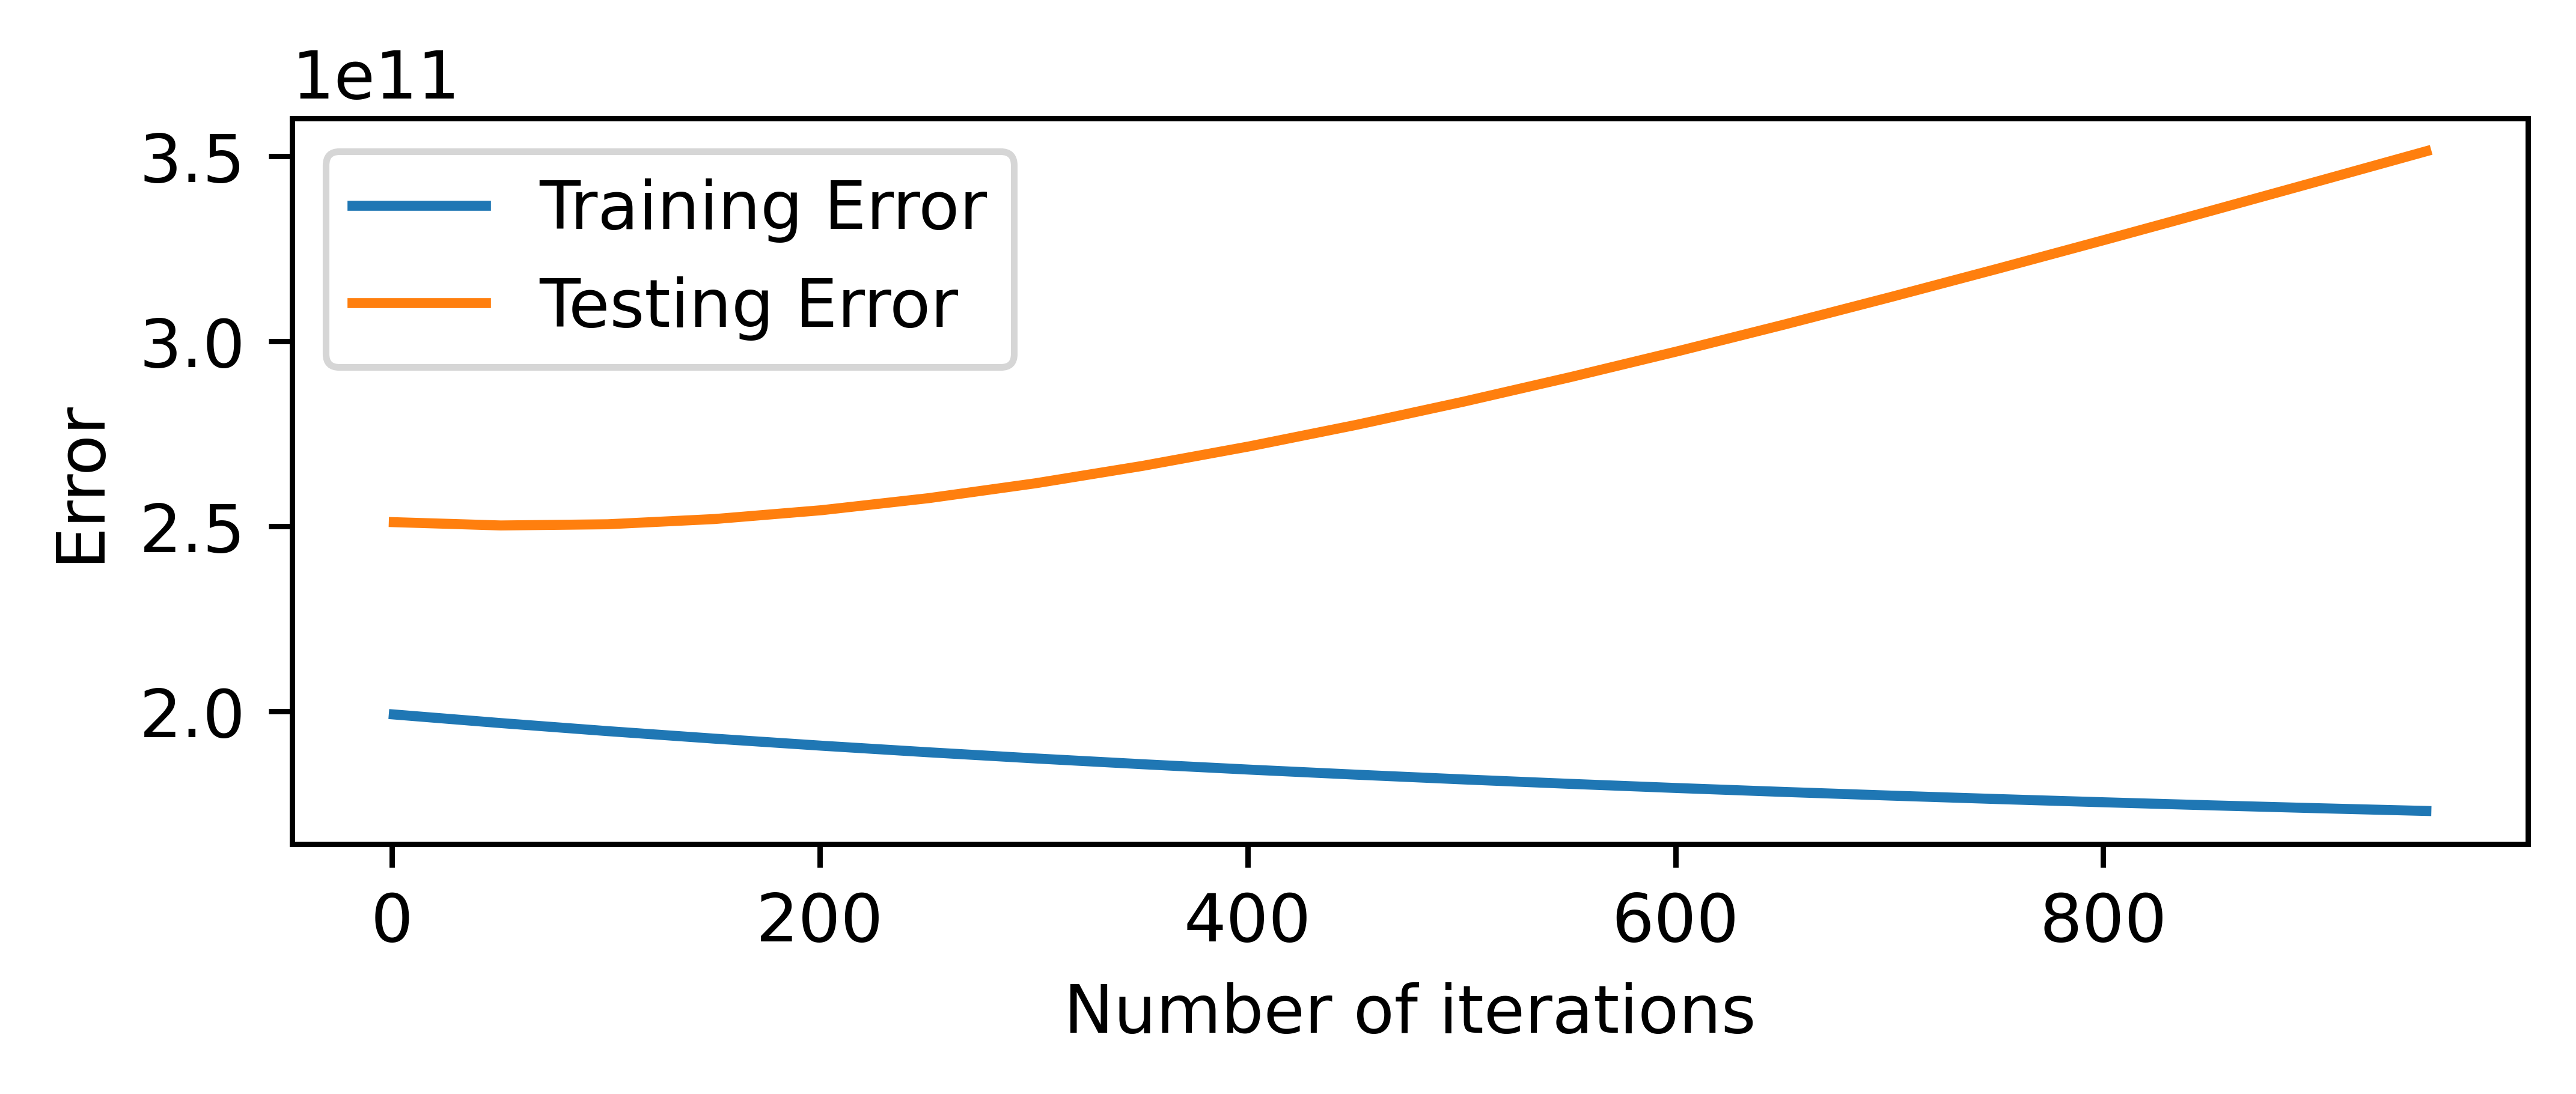

In [90]:
plt.figure(dpi=800,figsize=(6,2))
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.plot(epoc,error_train)
plt.plot(epoc,error_testing)
plt.legend(['Training Error','Testing Error'])
plt.show()